In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate

import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_excel('../data/premiums.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


In [111]:
df.shape

(50000, 13)

In [112]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [113]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

Here we replace all the spaces into '_' and make all the col names in small or lower case

In [114]:
df.isna().sum()

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [115]:
# Let see the persentage of missing data

df.isna().sum()/df.count()*100

age                      0.000000
gender                   0.000000
region                   0.000000
marital_status           0.000000
number_of_dependants     0.000000
bmi_category             0.000000
smoking_status           0.022005
employment_status        0.004000
income_level             0.026007
income_lakhs             0.000000
medical_history          0.000000
insurance_plan           0.000000
annual_premium_amount    0.000000
dtype: float64

as we can notice the percentage is very low we can drop those missing records

In [116]:
df.dropna(how='any',inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [119]:
df[df['number_of_dependants']<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [120]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [121]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    49976.000000
mean         1.717284
std          1.491953
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49976 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    49976 non-null  int64 
 1   gender                 49976 non-null  object
 2   region                 49976 non-null  object
 3   marital_status         49976 non-null  object
 4   number_of_dependants   49976 non-null  int64 
 5   bmi_category           49976 non-null  object
 6   smoking_status         49976 non-null  object
 7   employment_status      49976 non-null  object
 8   income_level           49976 non-null  object
 9   income_lakhs           49976 non-null  int64 
 10  medical_history        49976 non-null  object
 11  insurance_plan         49976 non-null  object
 12  annual_premium_amount  49976 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.3+ MB


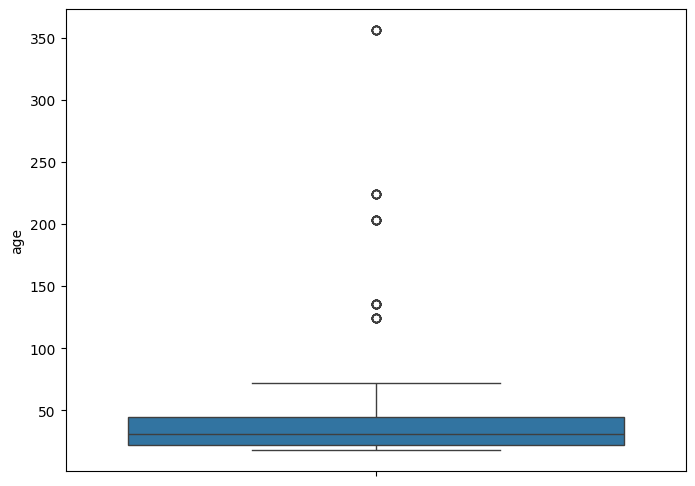

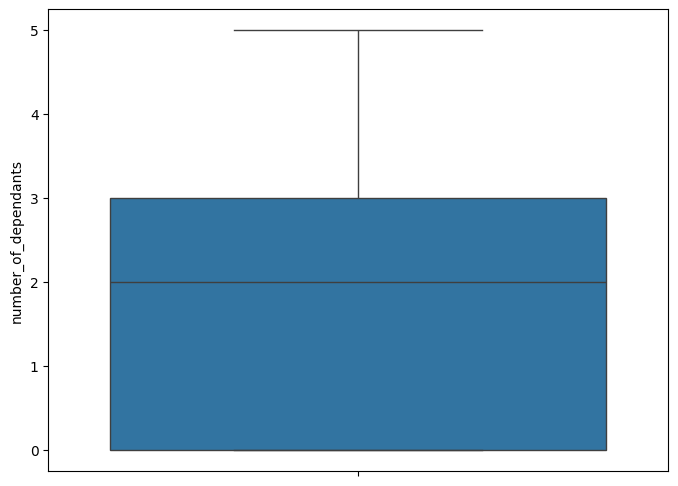

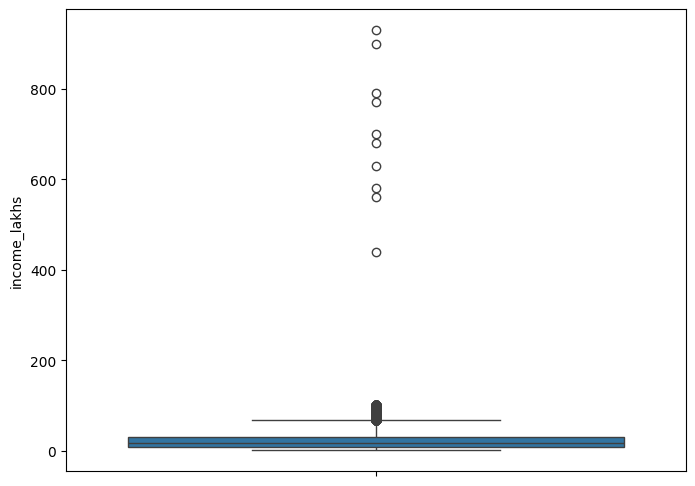

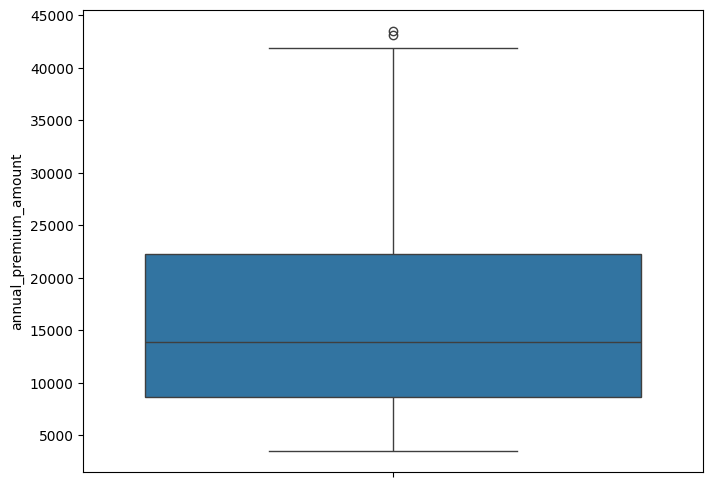

In [123]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

In [124]:
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

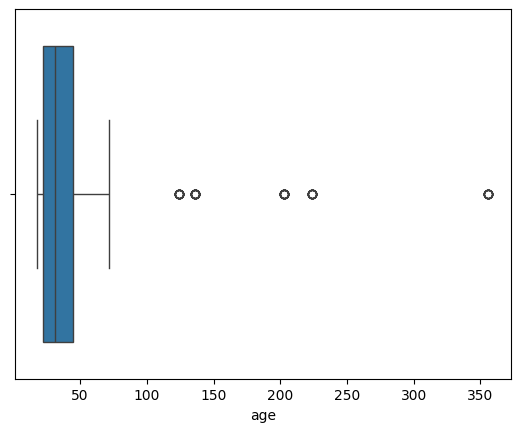

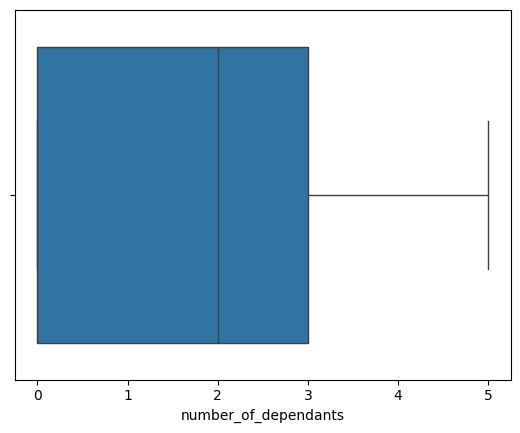

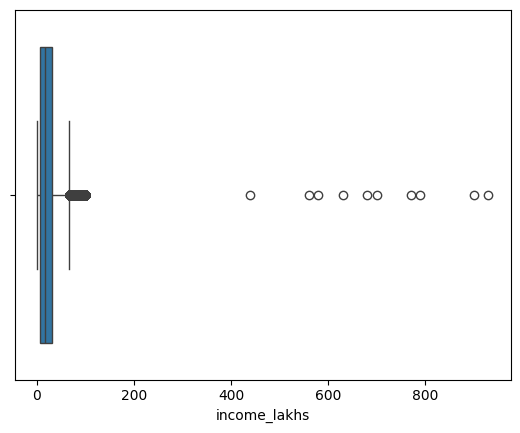

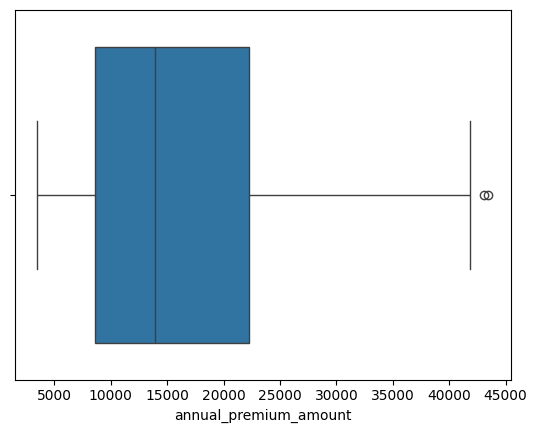

In [125]:
for i in num_feature:
    sns.boxplot(x=df[i])
    plt.show()

In [126]:
# outlier tretment for age

df[df['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
114,224,Male,Northeast,Married,3,Normal,Regular,Salaried,25L - 40L,26,No Disease,Gold,27523
786,124,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,> 40L,46,No Disease,Silver,11752
1298,124,Female,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,5311
1456,124,Female,Southwest,Unmarried,1,Overweight,No Smoking,Salaried,<10L,2,Diabetes,Bronze,10238
1470,136,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,10L - 25L,15,High blood pressure,Gold,31913
1773,203,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,6,Diabetes,Bronze,8762
3658,136,Male,Southwest,Married,2,Normal,Regular,Salaried,10L - 25L,20,Diabetes & Thyroid,Gold,31402
4246,203,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,5254
5699,124,Female,Southeast,Unmarried,1,Normal,No Smoking,Self-Employed,25L - 40L,29,No Disease,Silver,10265
5951,136,Male,Southwest,Married,3,Underweight,Regular,Self-Employed,<10L,2,Heart disease,Silver,26127


In [127]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

as we know it is highly unlikly to have age of a person will be around this [224, 124, 136, 203, 356] list so we are droping those records

In [128]:
df1 = df[df['age']<100].copy()
df1['age'].describe()

count    49918.000000
mean        34.401839
std         13.681600
min         18.000000
25%         22.000000
50%         31.000000
75%         45.000000
max         72.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

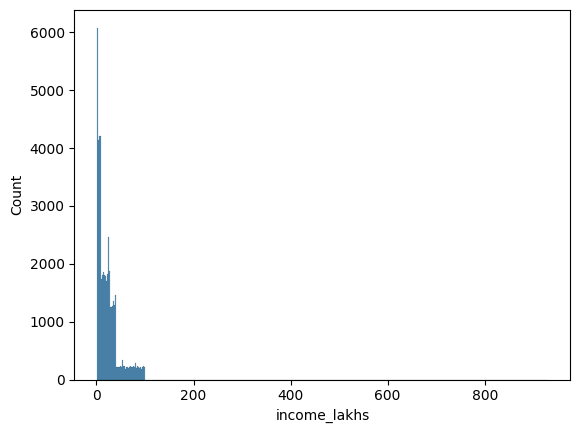

In [129]:
sns.histplot(df1['income_lakhs'])

In [130]:
def get_outliers(col):
    q1,q3 = col.quantile([0.25,0.95])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr 
    return upper,lower

In [131]:
upper,lower = get_outliers(df1['income_lakhs'])

In [132]:
print(upper,lower)

182.0 -98.0


In [133]:
df1[df1['income_lakhs']>upper].shape

(10, 13)

In [134]:
df2 = df1[df1['income_lakhs']<upper]

In [135]:
df2['income_lakhs'].describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

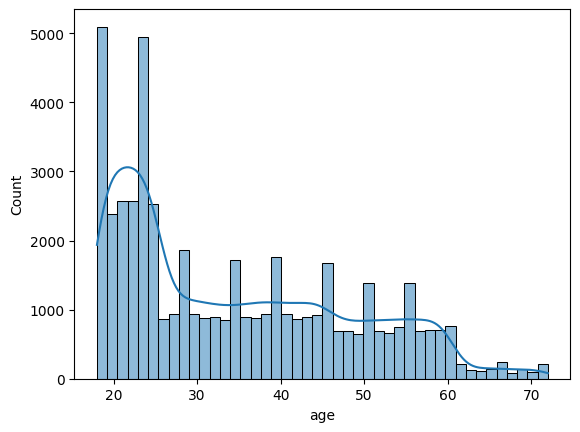

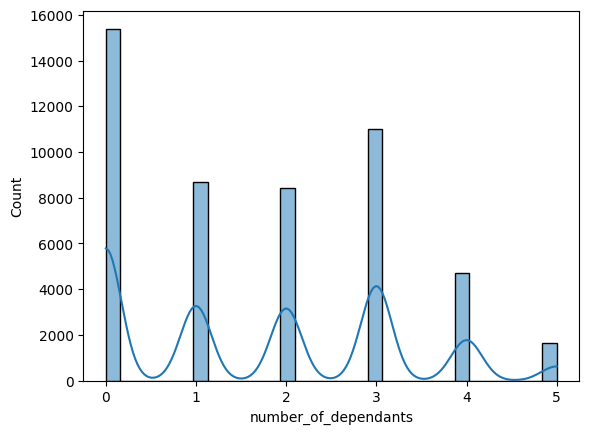

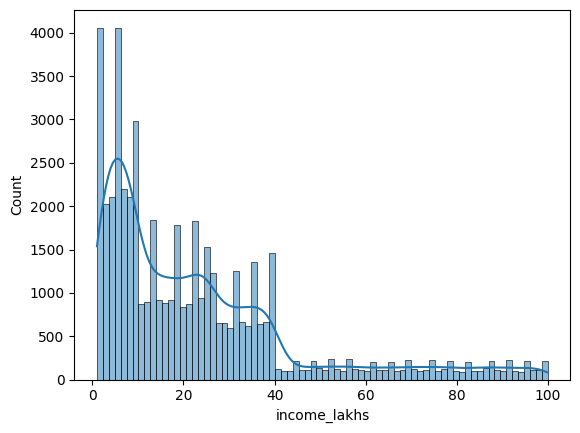

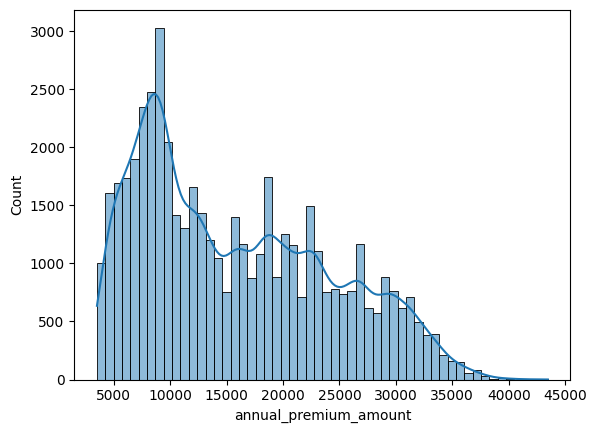

In [136]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.histplot(df2[i],kde=True)
        plt.show()

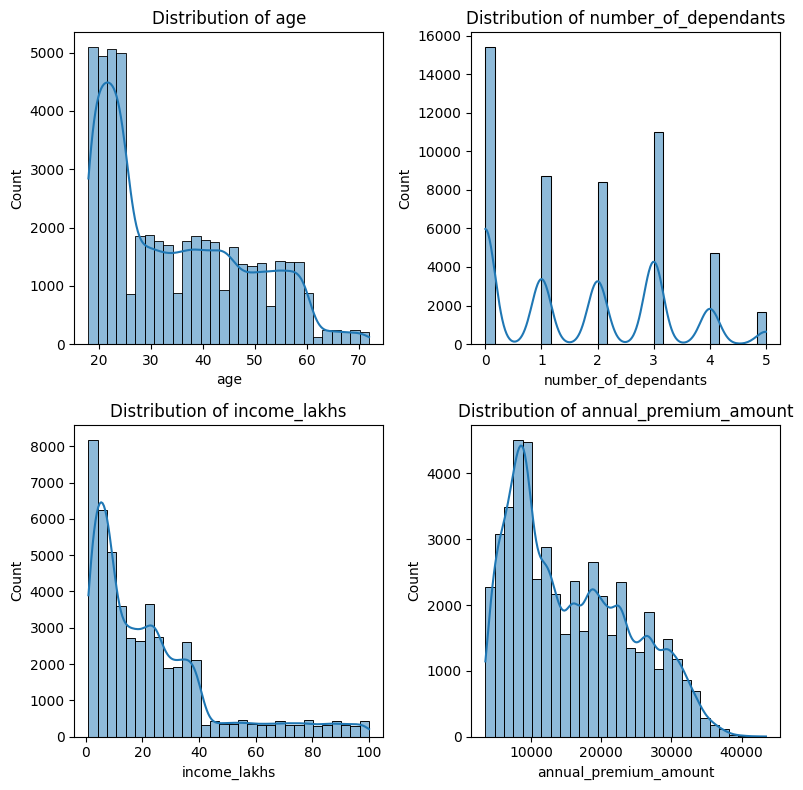

In [137]:
# Select numeric columns
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']

# Define number of columns per row
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(8, 4 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

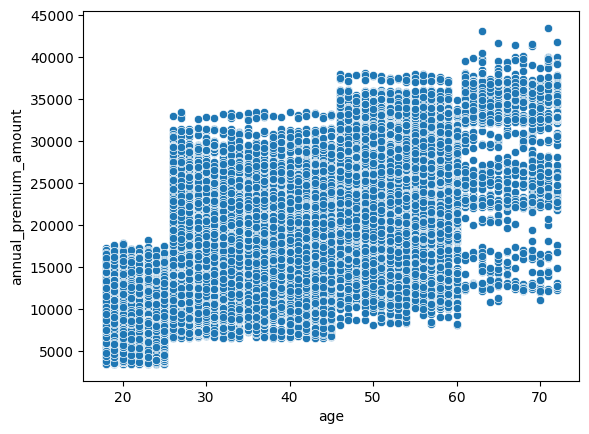

In [138]:
sns.scatterplot(df2,x='age',y='annual_premium_amount')

<Axes: xlabel='age', ylabel='income_lakhs'>

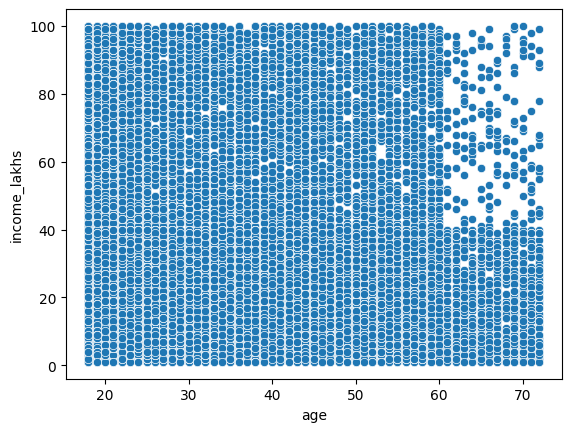

In [139]:
sns.scatterplot(df2,x='age',y='income_lakhs')

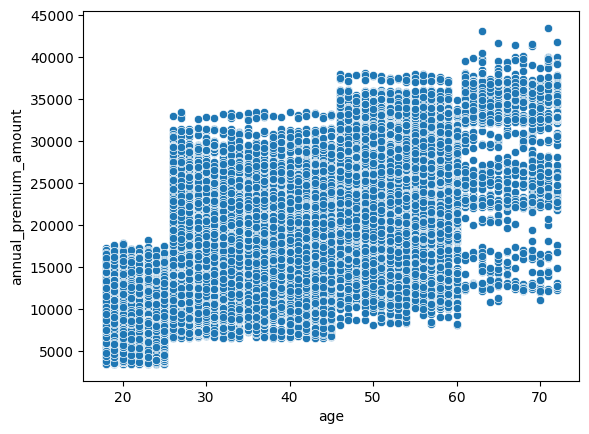

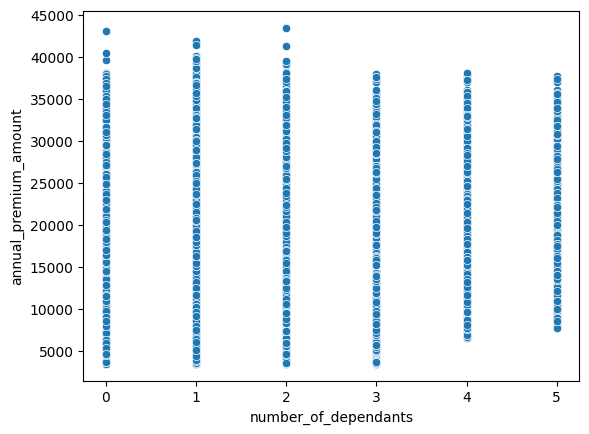

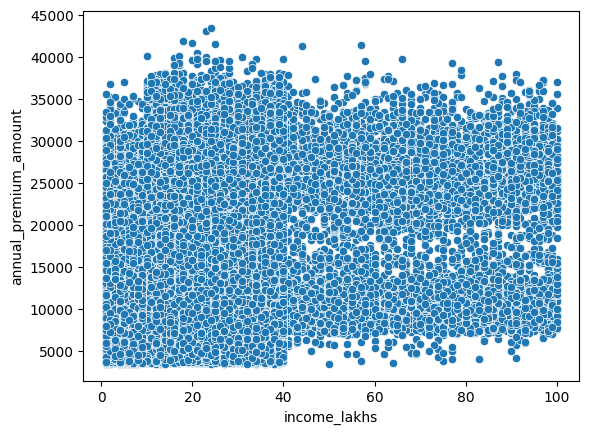

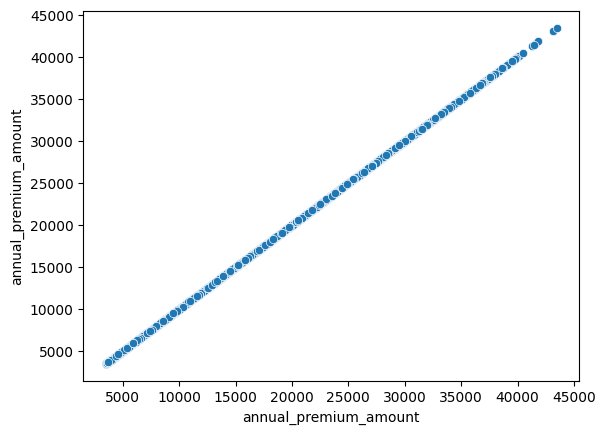

In [140]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.scatterplot(df2,x=i,y='annual_premium_amount')
        plt.show()

In [141]:
cat_features = df2.select_dtypes(include='object').columns
for i in cat_features:
    print(i, ":",df2[i].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [142]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

In [143]:
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

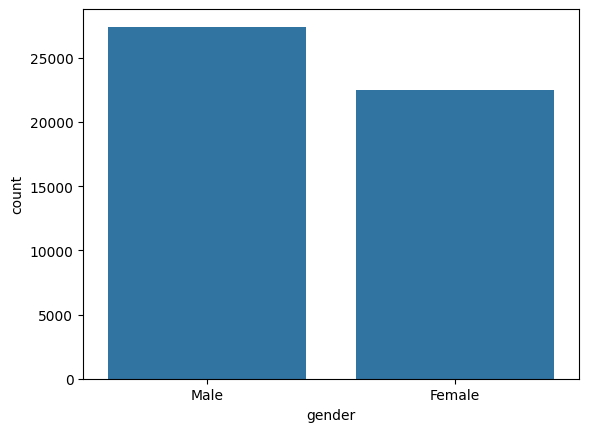

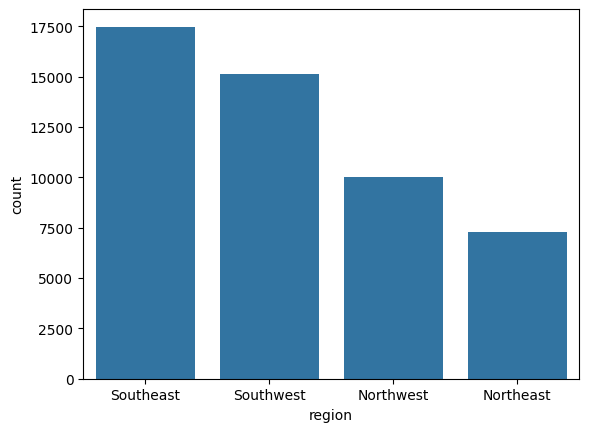

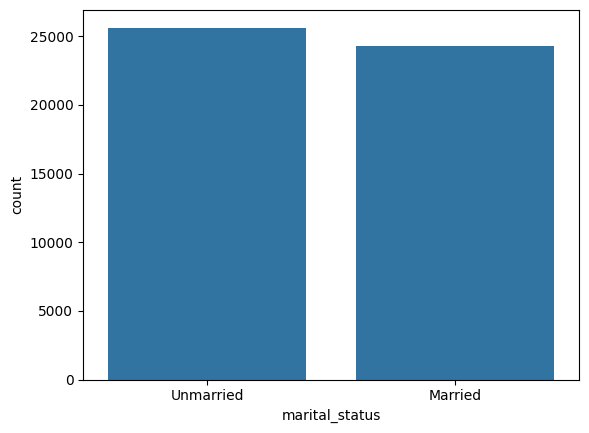

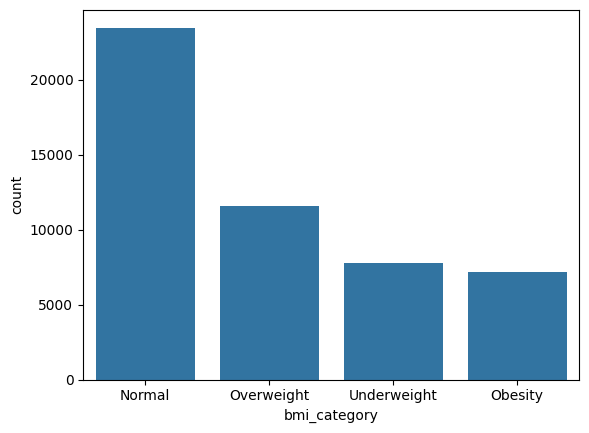

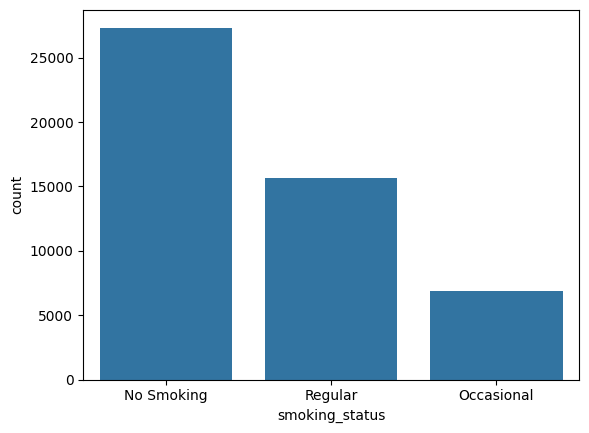

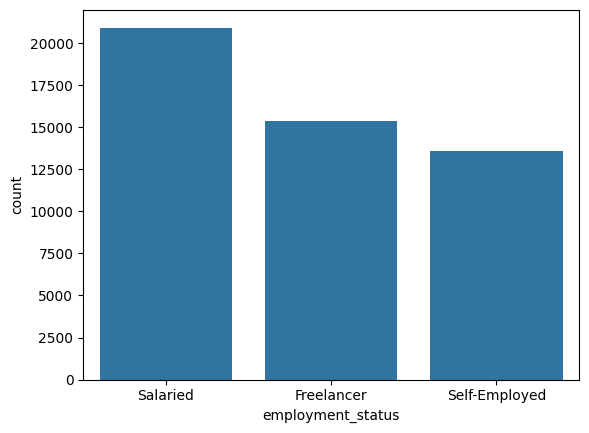

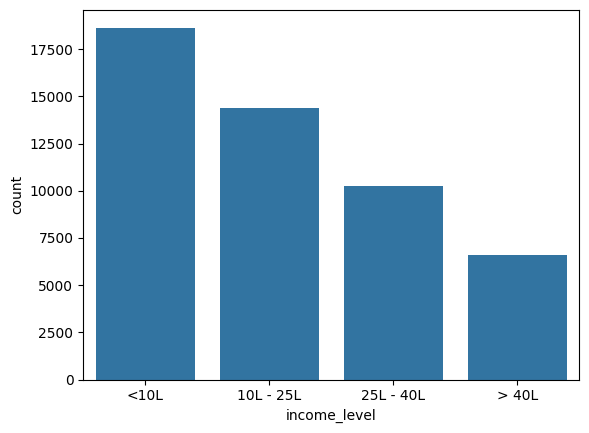

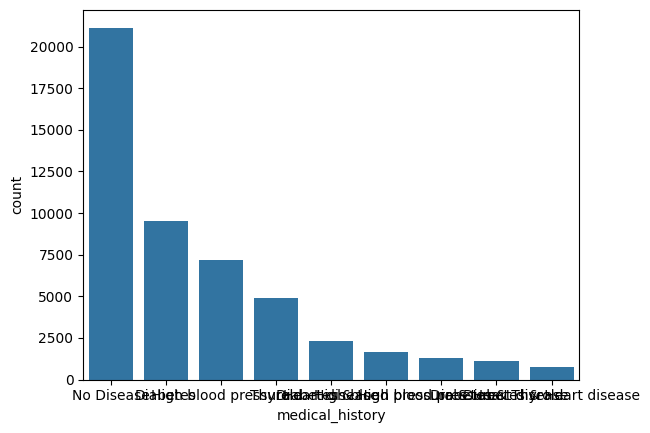

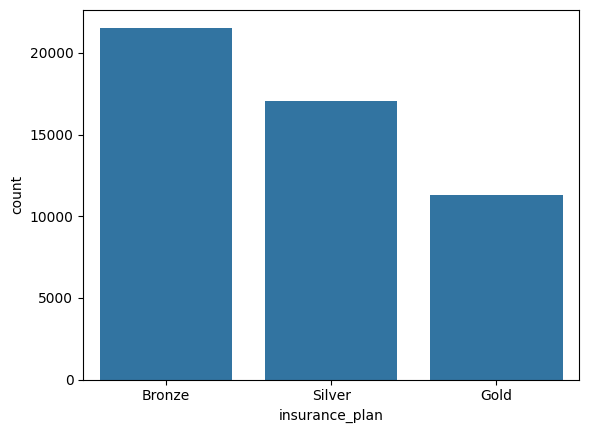

In [144]:
for i in cat_features:
    sns.barplot(df2[i].value_counts())
    plt.show()

In [145]:
for i in cat_features:
    print(df2[i].value_counts(normalize=True))

gender
Male      0.549631
Female    0.450369
Name: proportion, dtype: float64
region
Southeast    0.350385
Southwest    0.303038
Northwest    0.200930
Northeast    0.145648
Name: proportion, dtype: float64
marital_status
Unmarried    0.513545
Married      0.486455
Name: proportion, dtype: float64
bmi_category
Normal         0.470245
Overweight     0.231245
Underweight    0.155326
Obesity        0.143183
Name: proportion, dtype: float64
smoking_status
No Smoking    0.547868
Regular       0.313857
Occasional    0.138274
Name: proportion, dtype: float64
employment_status
Salaried         0.419412
Freelancer       0.308548
Self-Employed    0.272041
Name: proportion, dtype: float64
income_level
<10L         0.373547
10L - 25L    0.287910
25L - 40L    0.205839
> 40L        0.132704
Name: proportion, dtype: float64
medical_history
No Disease                             0.423539
Diabetes                               0.191011
High blood pressure                    0.144446
Thyroid             

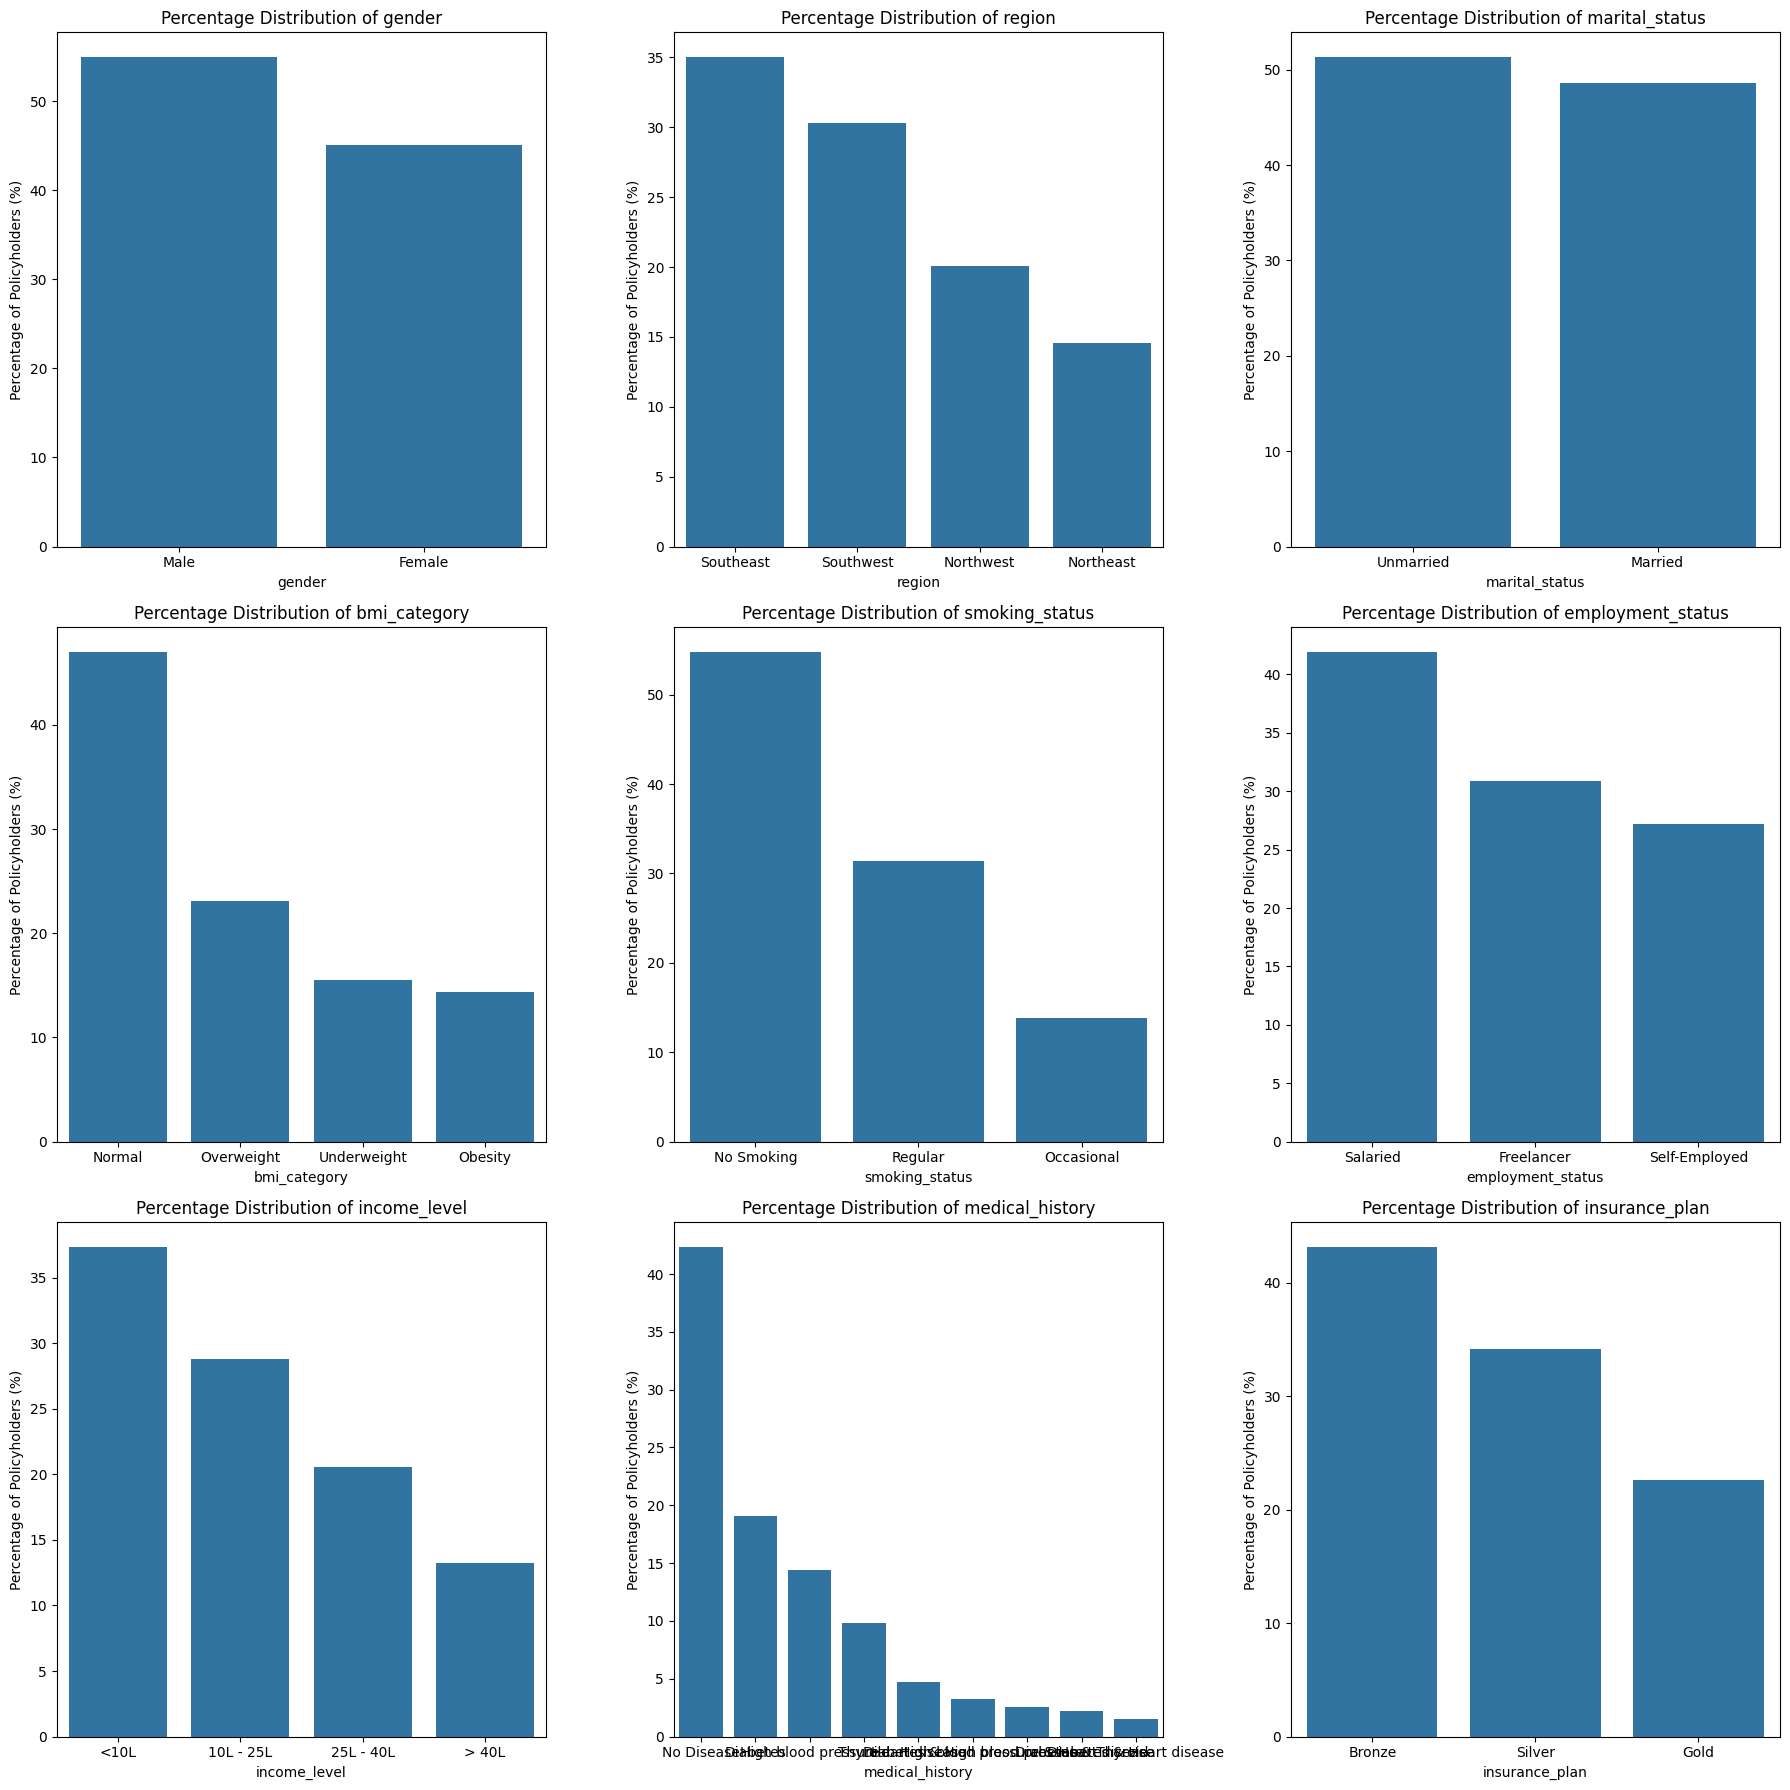

In [146]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()

for ax,col in zip(axes,cat_features):
    cat_count = df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=cat_count.index,y=cat_count.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [147]:
tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


<Axes: xlabel='income_level'>

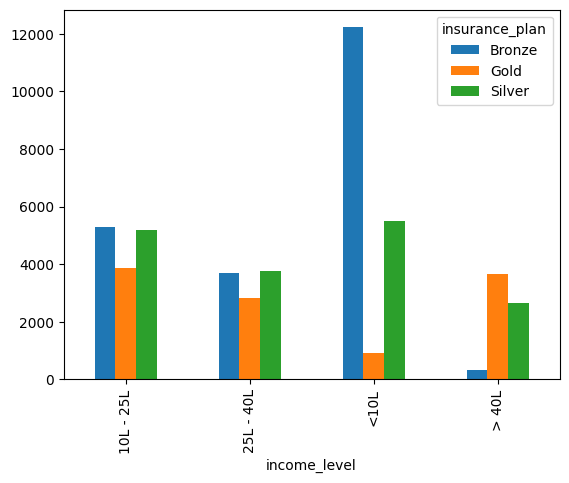

In [148]:
tab.plot(kind='bar')

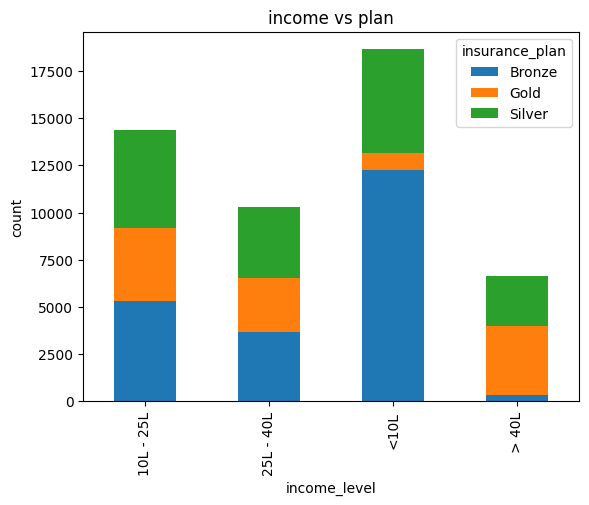

In [149]:
tab.plot(kind='bar',stacked=True)
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

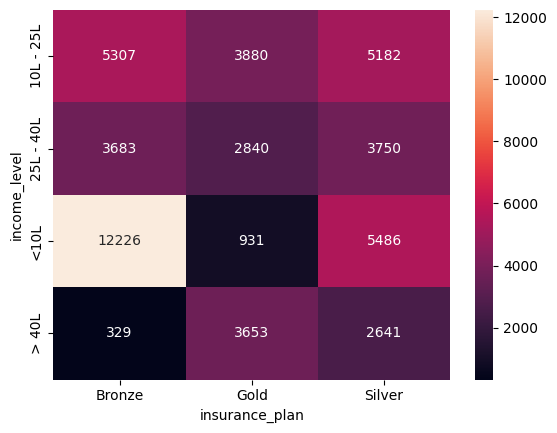

In [150]:
sns.heatmap(tab,annot=True,fmt='d')

In [151]:
df2['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [152]:
# as per business we have a risk score

risk_score ={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [153]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,None
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,None
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,None
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,None
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None


In [154]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

In [155]:
df2['total_risk_score'] = 0

for x in ['disease1','disease2']:
    df2['total_risk_score'] += df2[x].map(risk_score)

# Normalised the total_risk

max_score = df2['total_risk_score'].max() 
min_score = df2['total_risk_score'].min()
df2['normalised_risk_score'] = (df2['total_risk_score'] - min_score)/(max_score-min_score)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571


In [156]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [157]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2['insurance_plan'].unique()

array([1, 2, 3])

In [158]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [159]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalised_risk_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,1,6,Diabetes,1,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,1,6,Diabetes,1,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,2,20,High blood pressure,2,18164,high blood pressure,none,6,0.428571


In [160]:
df2['income_level'].unique()

array([1, 2, 4, 3])

In [161]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'disease1', 'disease2', 'total_risk_score',
       'normalised_risk_score'],
      dtype='object')

In [162]:
# drop redandant col

df2.drop(columns=['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1,inplace=True)

In [163]:
noninal_col = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status']

df2_encode = pd.get_dummies(df2,columns=noninal_col,drop_first=True,dtype=int)
df2_encode.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


<Axes: >

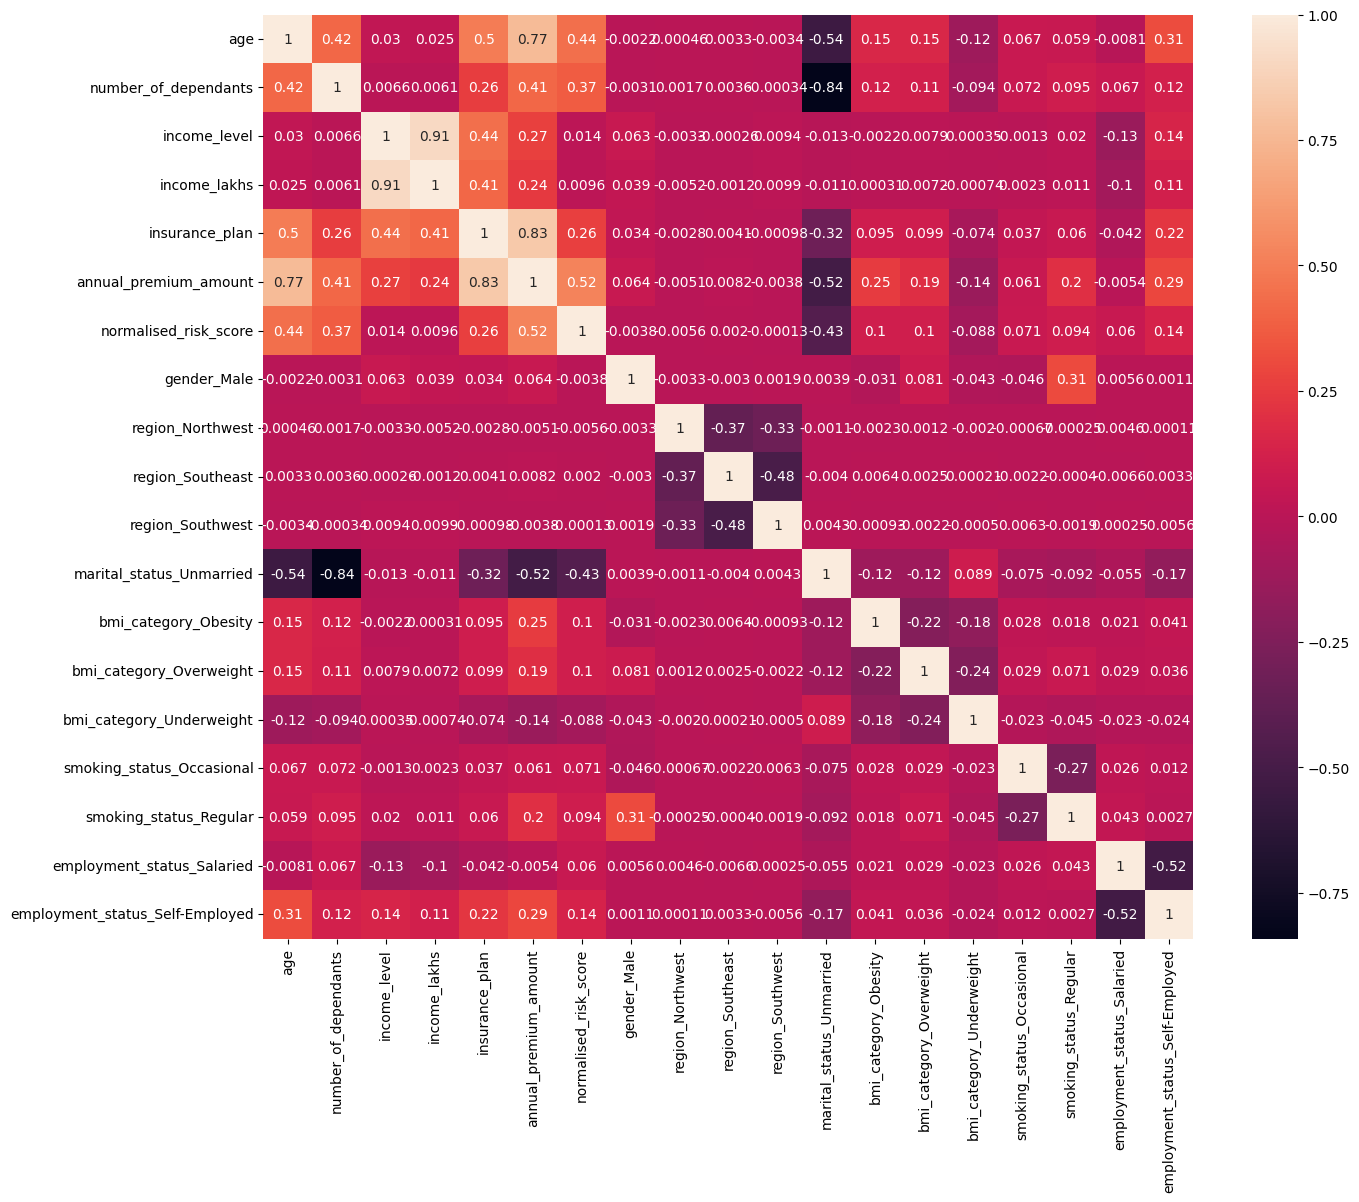

In [164]:
cor = df2_encode.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [165]:
df2_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0


In [166]:
x = df2_encode.drop('annual_premium_amount',axis=1)
y = df2_encode['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
scale = MinMaxScaler()

x[col_to_scale] = scale.fit_transform(x[col_to_scale])
x.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [167]:
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
def cal_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor (data.values,i) for i in range(data.shape[1])]
    return vif_df

In [169]:
cal_vif(x)

,column,vif
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalised_risk_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [170]:
cal_vif(x.drop('income_level',axis=1))

,column,vif
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalised_risk_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [171]:
x_redused = x.drop('income_level',axis=1)
x_redused.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [172]:
x_train,x_test,y_train,y_test = train_test_split(x_redused,y,test_size=0.3,random_state=42)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (34935, 17)
x_test (14973, 17)
y_train (34935,)
y_test (14973,)


In [173]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_test = model_lr.predict(x_test)
y_pred_train = model_lr.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9225249281659837
Test Accuracy 0.9227015645859027


In [174]:
model_lr.coef_

array([11236.4082633 ,  -536.61172956,  -353.97067084, 12515.43782972,
        4846.88626348,   121.53023031,   -34.50219135,    27.97504587,
         -23.47372614,  -821.78088646,  3356.07750448,  1613.1421694 ,
         364.31350886,   722.41051531,  2261.97816483,   149.57179545,
         378.25130285])

In [175]:
model_lr.intercept_

np.float64(4701.438053965807)

In [176]:
feature_imp = model_lr.coef_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)
cof_df

,coefficents
insurance_plan,12515.437830
age,11236.408263
normalised_risk_score,4846.886263
bmi_category_Obesity,3356.077504
smoking_status_Regular,2261.978165
bmi_category_Overweight,1613.142169
smoking_status_Occasional,722.410515
employment_status_Self-Employed,378.251303
bmi_category_Underweight,364.313509
employment_status_Salaried,149.571795


<Axes: xlabel='coefficents', ylabel='None'>

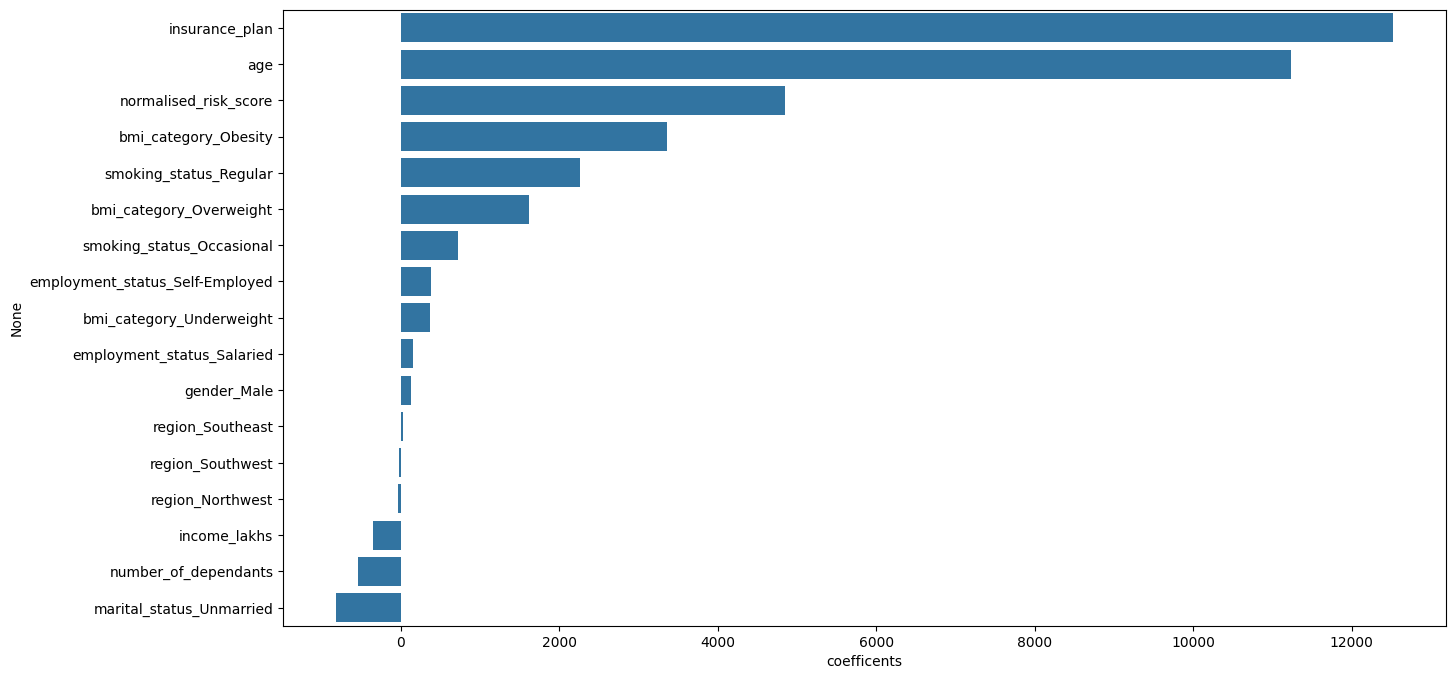

In [177]:
plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)


In [178]:
model_rg = Ridge()
model_rg.fit(x_train,y_train)
y_pred_test = model_rg.predict(x_test)
y_pred_train = model_rg.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9225028570862839
Test Accuracy 0.9226796251862842


In [179]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9858725070953369
Test Accuracy 0.9804509282112122


In [180]:
params_grid ={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)
random_cv.fit(x_train,y_train)
random_cv.best_score_

np.float64(0.9810737768809)

In [181]:
best_model = random_cv.best_estimator_

In [182]:
random_cv.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

<Axes: xlabel='coefficents', ylabel='None'>

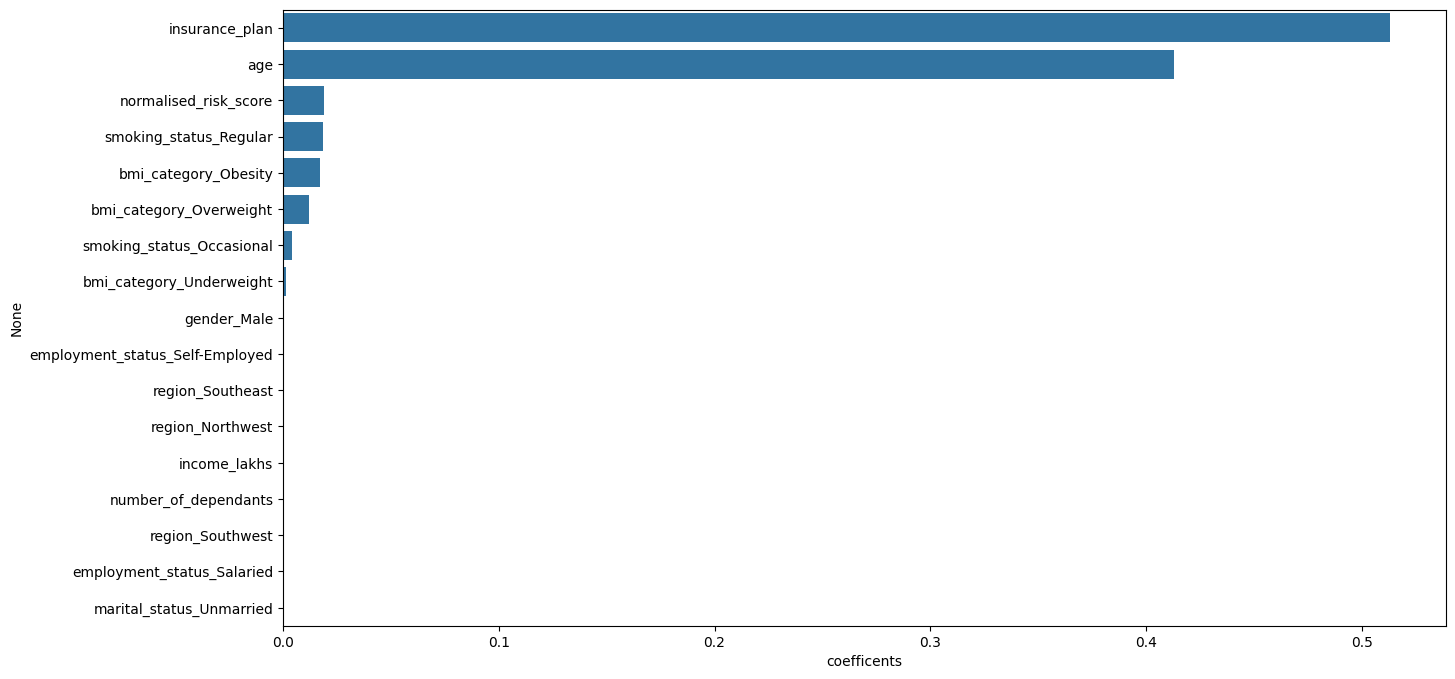

In [183]:
feature_imp = best_model.feature_importances_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)

## Error Analysis

In [184]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})

result_df.head() 

,actual,predicted,diff,diff_pct
24098,9246,9547.453125,301.453125,3.260363
201,11664,13488.259766,1824.259766,15.640087
25471,10472,7417.219727,-3054.780273,-29.170935
32500,26267,25508.873047,-758.126953,-2.886233
30832,9106,9547.453125,441.453125,4.847937


<Axes: xlabel='diff_pct', ylabel='Count'>

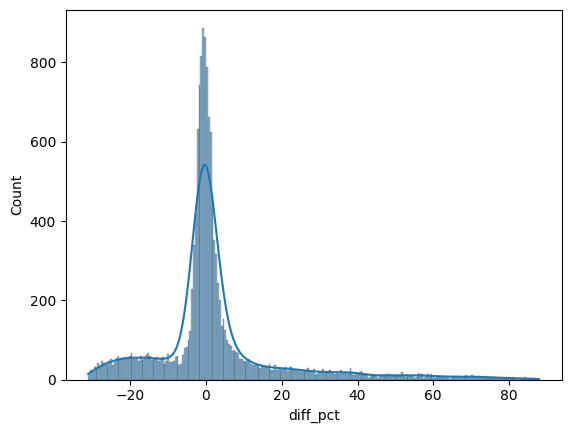

In [185]:
sns.histplot(result_df['diff_pct'],kde=True)

In [186]:
error_threshold = 10
error_df = result_df[np.abs(result_df['diff_pct']>error_threshold)]
error_df.shape

(2378, 4)

In [187]:
result_df.shape

(14973, 4)

In [188]:
# percentage of extrime error

extreme_error_pct = error_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

15.881920790756695

here it says that more then 15% of the recoreds show an error margen of more then 10%

In [189]:
result_df[np.abs(result_df['diff_pct']>50)].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct
25207,3501,6578.916016,3077.916016,87.915339
29904,3503,6578.916016,3075.916016,87.808051
48801,3516,6578.916016,3062.916016,87.113652
10288,3517,6578.916016,3061.916016,87.060450
23975,3520,6578.916016,3058.916016,86.901023
...,...,...,...,...
17089,4960,7456.396484,2496.396484,50.330574
14376,4887,7345.736816,2458.736816,50.311783
4067,4846,7276.824707,2430.824707,50.161467
23368,4360,6544.921875,2184.921875,50.112887


In [190]:
x_test.index

Index([24098,   201, 25471, 32500, 30832, 11631, 12814, 33373,  5408, 47939,
       ...
        7746, 25417,  8104, 11125,   679, 12123, 31891,  6713, 16957, 15109],
      dtype='int64', length=14973)

In [191]:
error_df.index

Index([  201, 47939, 26239, 16907, 16861,  8403, 38677, 32319, 19756, 29572,
       ...
       10671, 13048, 37101, 38094, 43516,  1521, 39176, 43822, 24771,  7746],
      dtype='int64', length=2378)

In [192]:
x_test.loc[error_df.index]

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.000000,0,1,0,0,1,0,0,0,0,0,0,0
47939,0.111111,0.0,0.424242,1.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.000000,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.000000,1,0,0,0,1,0,0,1,0,1,0,0
16861,0.055556,0.0,0.222222,0.0,0.000000,1,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,0.000000,0.0,0.383838,0.0,0.000000,1,0,0,1,1,0,0,0,0,0,0,0
39176,0.185185,0.8,0.050505,0.0,0.428571,1,0,0,1,0,0,0,0,0,0,0,1
43822,0.111111,0.2,0.020202,0.0,0.000000,0,0,1,0,1,1,0,0,0,0,0,0
24771,0.425926,0.6,0.313131,0.5,0.000000,0,0,1,0,0,0,0,0,0,0,0,0


In [193]:
extreme_error_df = x_test.loc[error_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0
16861,0.055556,0.0,0.222222,0.0,0.0,1,1,0,0,1,0,0,0,0,0,1,0


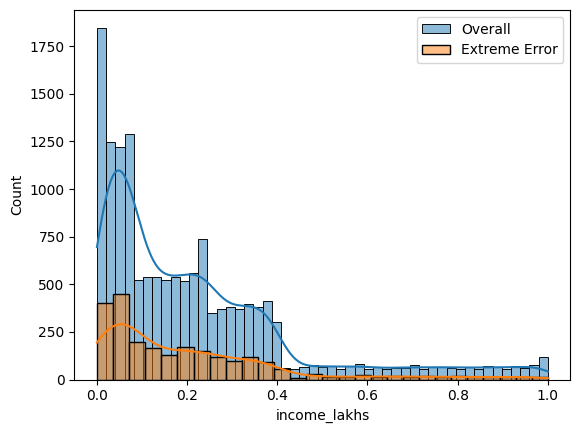

In [196]:
sns.histplot(x_test['income_lakhs'],label='Overall',kde=True)
sns.histplot(extreme_error_df['income_lakhs'],label='Extreme Error',kde=True)
plt.legend()
plt.show()

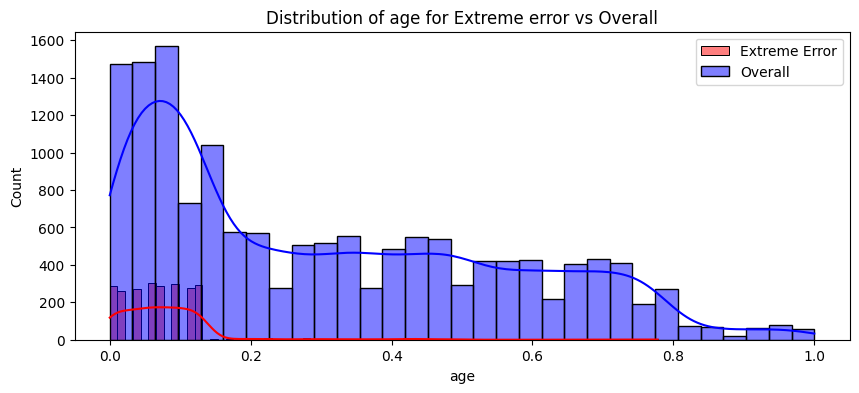

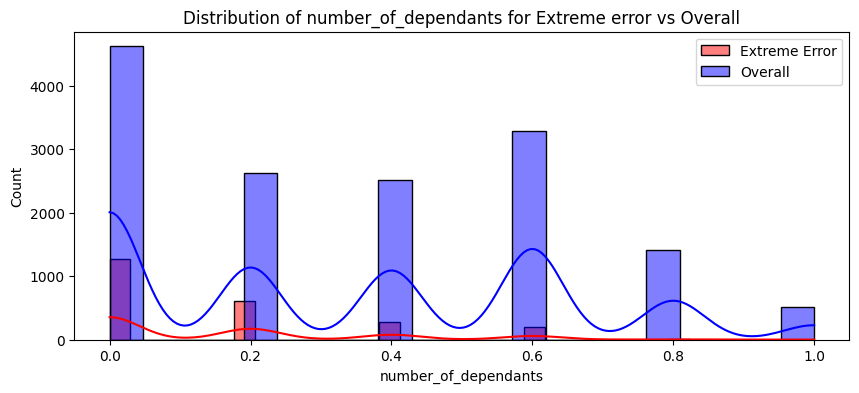

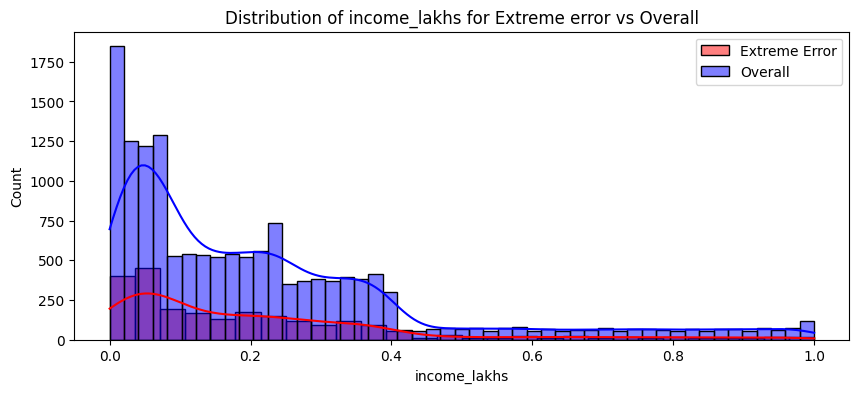

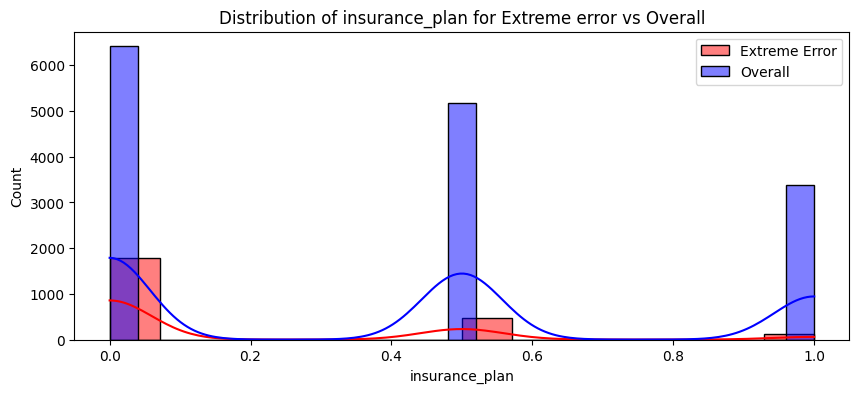

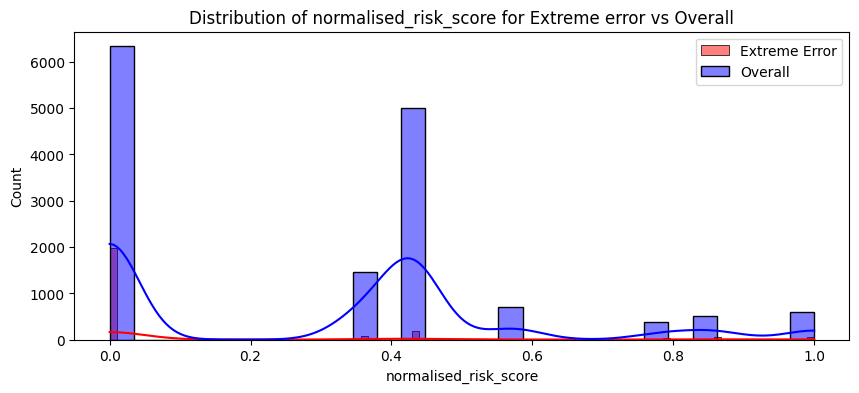

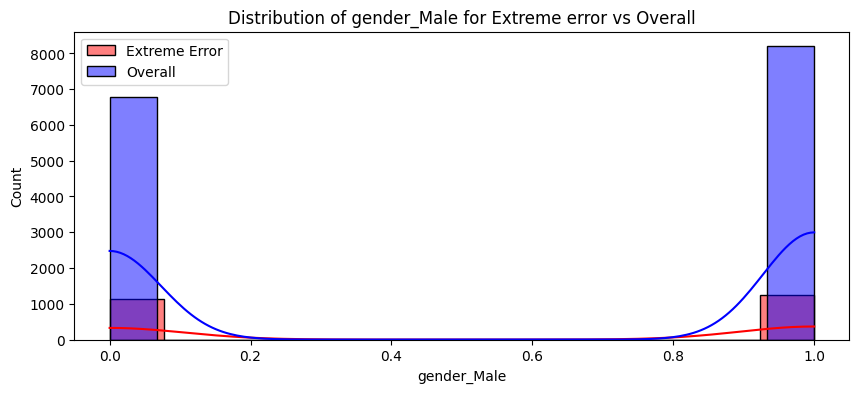

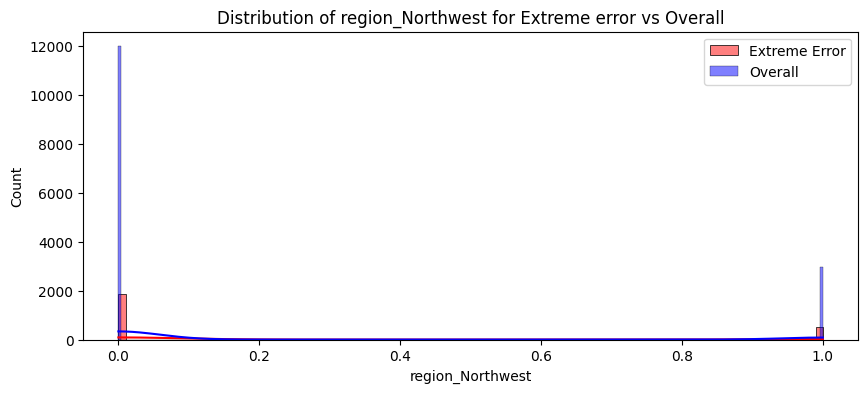

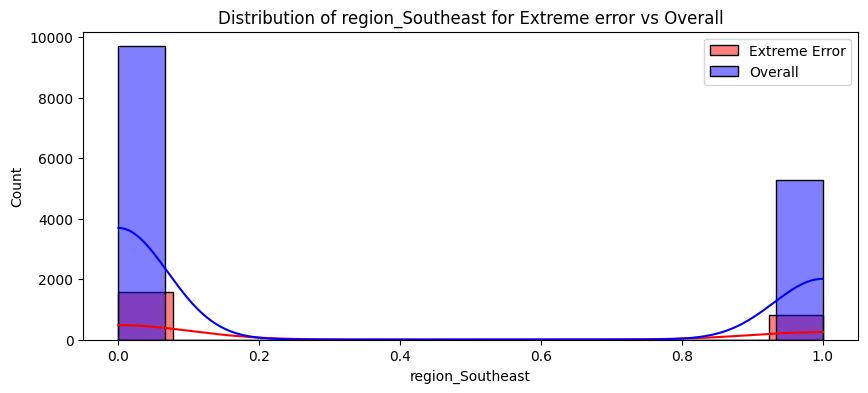

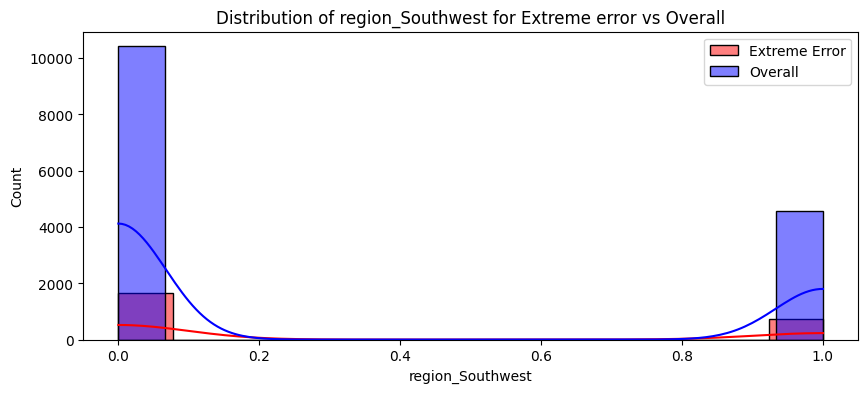

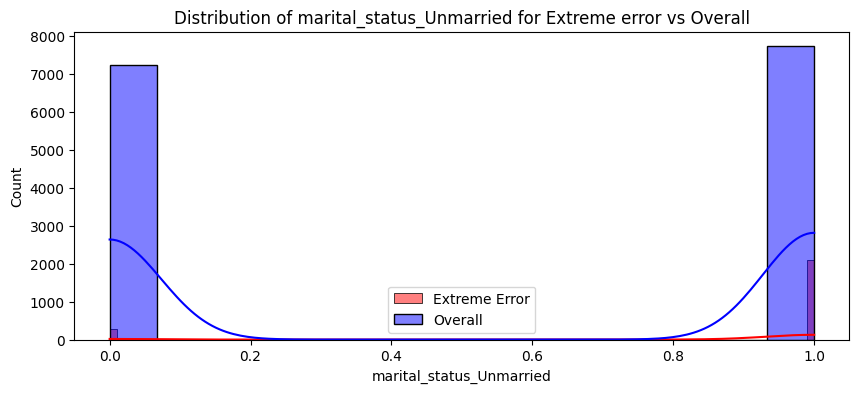

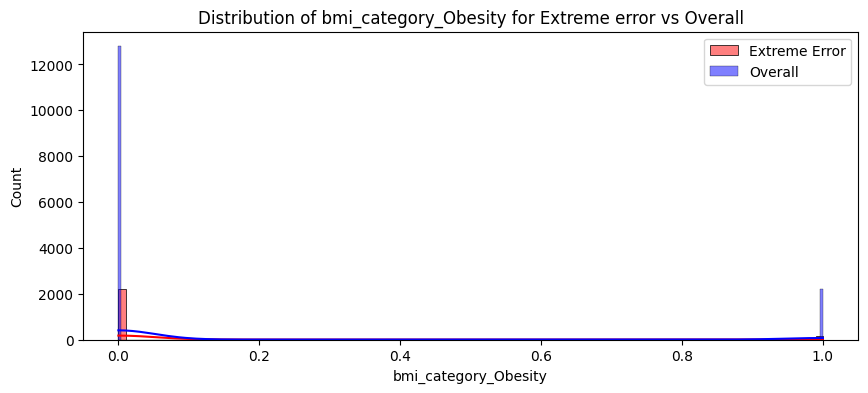

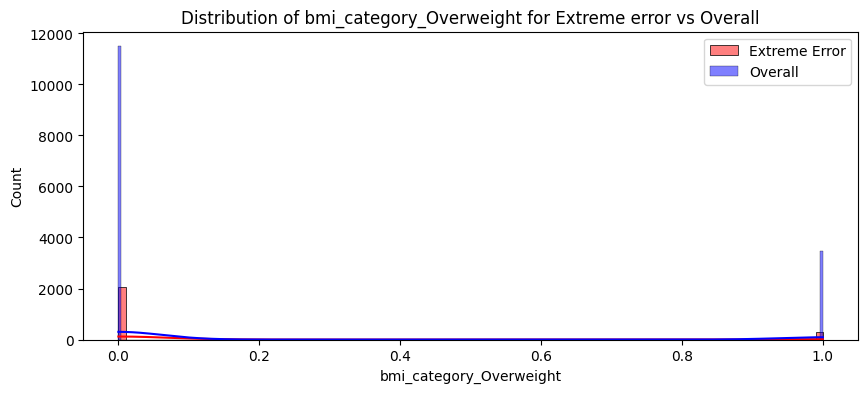

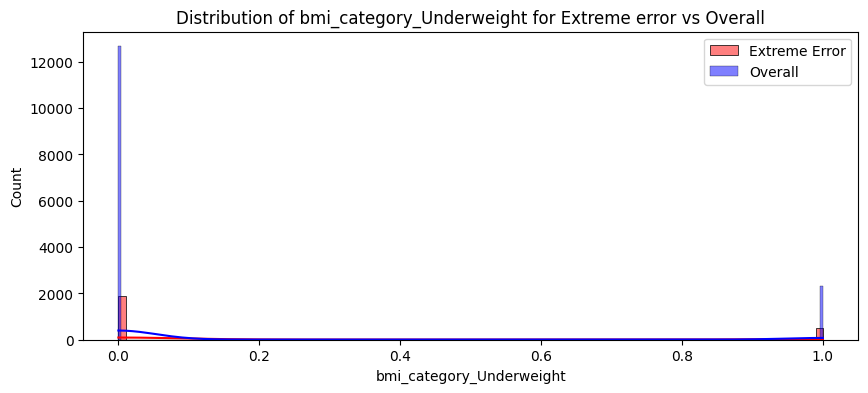

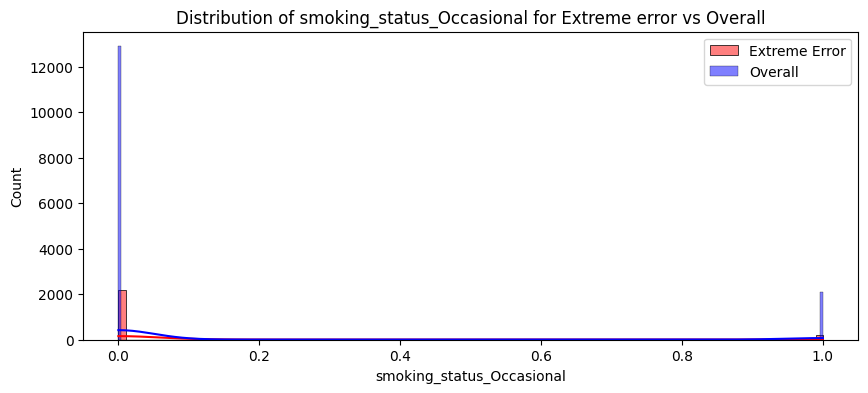

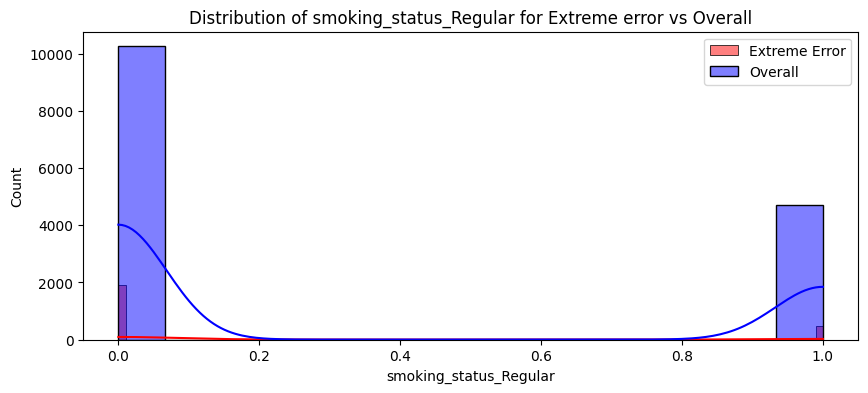

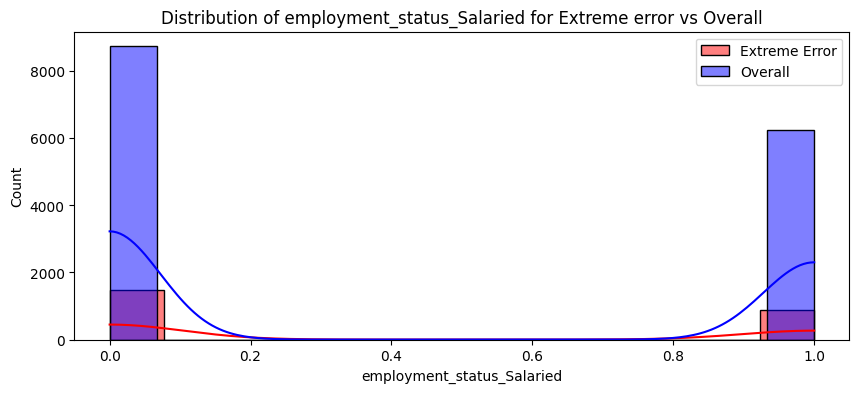

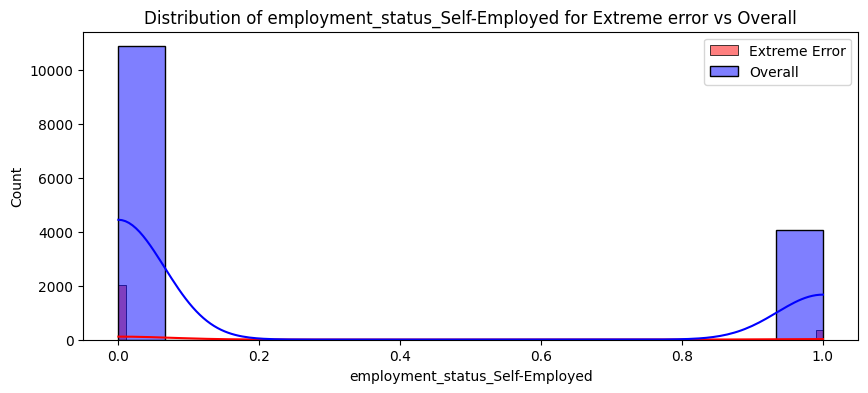

In [201]:
for x in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_error_df[x],color='red',label='Extreme Error',kde=True)
    sns.histplot(x_test[x],color='blue',label='Overall',alpha=0.5,kde=True)
    plt.legend()
    plt.title(f'Distribution of {x} for Extreme error vs Overall')
    plt.show()

here we saw that the kbe is differen in `age`

<Axes: xlabel='age', ylabel='Count'>

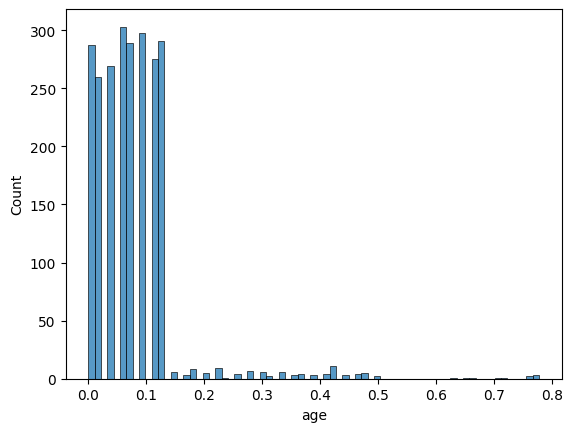

In [202]:
sns.histplot(extreme_error_df.age)

In [205]:
extreme_error_df['income_level'] =-1

In [206]:
df_reverse = pd.DataFrame()
df_reverse[col_to_scale] = scale.inverse_transform(extreme_error_df[col_to_scale])
df_reverse.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,1.0,-2.0,64.0,3.0
1,24.0,0.0,-2.0,43.0,3.0
2,20.0,0.0,-2.0,30.0,1.0
3,24.0,0.0,-2.0,61.0,2.0
4,21.0,0.0,-2.0,23.0,1.0


<Axes: xlabel='age', ylabel='Count'>

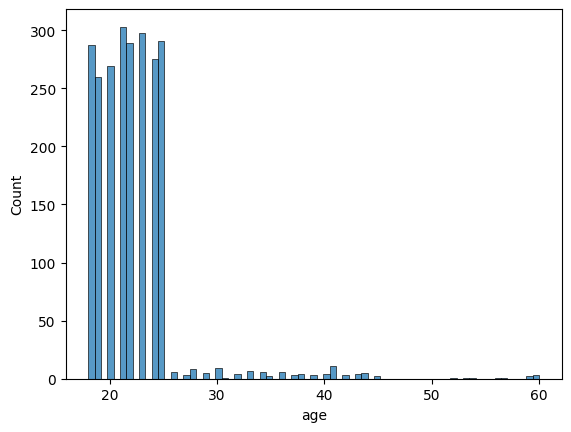

In [207]:
sns.histplot(df_reverse.age)

In [209]:
df_reverse.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
count,2378.000000,2378.000000,2378.0,2378.000000,2378.000000
mean,22.229184,0.772918,-2.0,21.211943,1.303616
std,4.292625,1.002600,0.0,20.698684,0.560511
min,18.000000,0.000000,-2.0,1.000000,1.000000
25%,20.000000,0.000000,-2.0,6.000000,1.000000
50%,22.000000,0.000000,-2.0,15.000000,1.000000
75%,24.000000,1.000000,-2.0,30.000000,2.000000
max,60.000000,5.000000,-2.0,100.000000,3.000000


In [213]:
df_reverse['age'].quantile(0.95)

np.float64(25.0)

# Model Segmentation

create two model one for age <= 25 and other for >25 age 

In [218]:
df = pd.read_excel('../data/premiums.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [219]:
df_young = df[df['Age']<=25]
df_rest = df[df['Age']>25]

In [220]:
df_young.shape,df_rest.shape

((20096, 13), (29904, 13))

In [221]:
df_young.to_excel('../data/Premiums_young.xlsx',index=False)
df_rest.to_excel('../data/Premiums_rest.xlsx',index=False)